In [108]:
import pandas as pd
import numpy as np

train_data=pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
test_data=pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


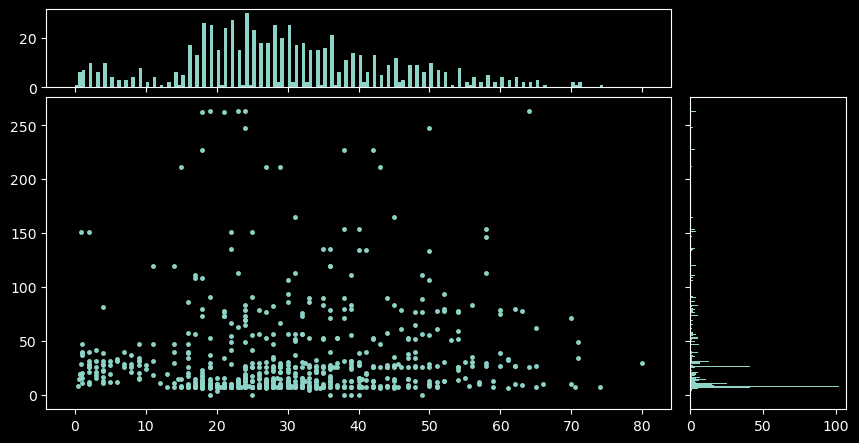

In [110]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, marker=".", s=25)

    # now determine nice limits by hand:
    binwidth = 0.5
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bin_x = np.arange(0, max(age), binwidth)
    bin_y = np.arange(0, lim, binwidth) #np.arange: Start, Stop, Step
    ax_histx.hist(x, bins=bin_x)
    ax_histy.hist(y, bins=bin_y, orientation='horizontal')

# Start with a square Figure.
fig = plt.figure(figsize=(10, 5))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05) 

# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.

scatter_hist(list(age), list(fare), ax, ax_histx, ax_histy) 

plt.show()

In [111]:
### RANDOM FOREST ###

### RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 

y = train_data["Survived"] 

features = ["Pclass", "Sex", "SibSp", "Parch"] 

X = pd.get_dummies(train_data[features]) # gibt die Liste ein und konvertiert sie in Pandas Features
X_test = pd.get_dummies(test_data[features]) # 

# definiert das model # Klasse/Objekt in SKLearn, Klasse RandomForestClassifier, Objekt model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1, oob_score=True) 

# Erstellt Decision Trees mit der Anzahl n_estimators
# Jeder einzelne Tree basiert auf dem bootstrapped data set. Also einer random Anordnung der Samples/Zeilen. Dabei können Zeilen auch mehrfach auftauchen.
# Beim Bootstrapping werden ein Drittel der Daten nicht genommen. Diese können zum Evaluieren des Forests genutzt werden
# Für den Aufbau des Decision Trees werden random nur mindestens 2 Features/Col_names betrachtet (beim Aufbau jeder einzelnen Node)
# Das Ergebnis ist eine binäre 1 oder 0 für Survived oder eben nicht.

# Füttert das Model mit Daten 
model.fit(X, y) 

predictions = model.predict(X_test) #Erstellt np.array mit Survived #Sagt also binär das Ergebnis voraus auf Basis des Random Forests

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions}) #Erstellt neuen Dataframe mit Passenger und Survived Spalten
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [112]:

### Wie gut ist der RandomForest? ### 
# Out-of-bag sind die Samples vom Bootstrapping, die nicht verwendet wurden.
# Out-of-bag-error ist der Vergleich mit den Vorhersagen dieser Samples mit ihren echten Ergebnissen für den RandomForest, vorhersagt ihr Resultat und vergleichts.

# Convert pd.series to numpy()
y_test = y.to_numpy()
y_pred_test = output['Survived'].to_numpy()

### How accurate ist the testing data displayed in the RandomForest
print('Just score whatever this is: ' + str(model.score(X, y)))

### Out-of-the Bag score. How accurate does the RandomForest predict
print('Out-of-bag Score: '+ str(model.oob_score_)) 

### Accuracy Score, was ist das?
#accuracy_score(X[:418].to_numpy(), y_pred_test)




Just score whatever this is: 0.8159371492704826
Out-of-bag Score: 0.7934904601571269


In [113]:
''

''